<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/Keras/Diabetes_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Descrição do Dataset

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medidas diagnósticas incluídas no conjunto de dados. Vários critérios foram aplicados na seleção dessas instâncias de um banco de dados maior. Em particular, todas as pacientes são mulheres com pelo menos 21 anos de idade e de herança indígena Pima.

[Dataset Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

Este dataset contém **768 instâncias** e **8 atributos**, além da variável alvo indicando a presença ou ausência de diabetes. Os atributos são:

- Pregnancies: Número de vezes grávida
- Glucose: Concentração de glicose plasmática 2 horas após um teste de tolerância à glicose oral
- BloodPressure: Pressão arterial diastólica (mm Hg)
- SkinThickness: Espessura da prega cutânea do tríceps (mm)
- Insulin: Insulina sérica em 2 horas (mu U/ml)
- BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
- DiabetesPedigreeFunction: Função pedigree do diabetes
- Age: Idade (anos)
- Outcome: Variável de classe (0 ou 1)

---
## Contato
- LinkedIn: [Henrique Baptista](https://www.linkedin.com/in/henrique-baptista777/)
    
- GitHub: [henriquebap](https://github.com/henriquebap)

- Email: henriquebaptista2003@gmail.com
    
**Para mais informações ou para entrar em contato, sinta-se à vontade para usar os links acima.**

## Análise do Dataset Carregamento dos Dados

In [3]:
path = "/content/diabetes.csv"
data = pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploração dos Dados

In [4]:
# Informações básicas
data.info()

# Estatísticas descritivas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Verificação de Valores Nulos ou Zero
Algumas variáveis, como pressão arterial, espessura da pele, insulina e IMC, não devem ser zero.
- Vamos verificar e tratar esses valores.

In [5]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Substituição dos Valores Zero

In [6]:
# Substituir zeros por NaN para análise posterior
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Preencher os NaNs com a média das colunas correspondentes
data.fillna(data.mean(), inplace=True)

### Análise exploratoria e Plot de Gráficos

Gráficos de Distribuição e Boxplots

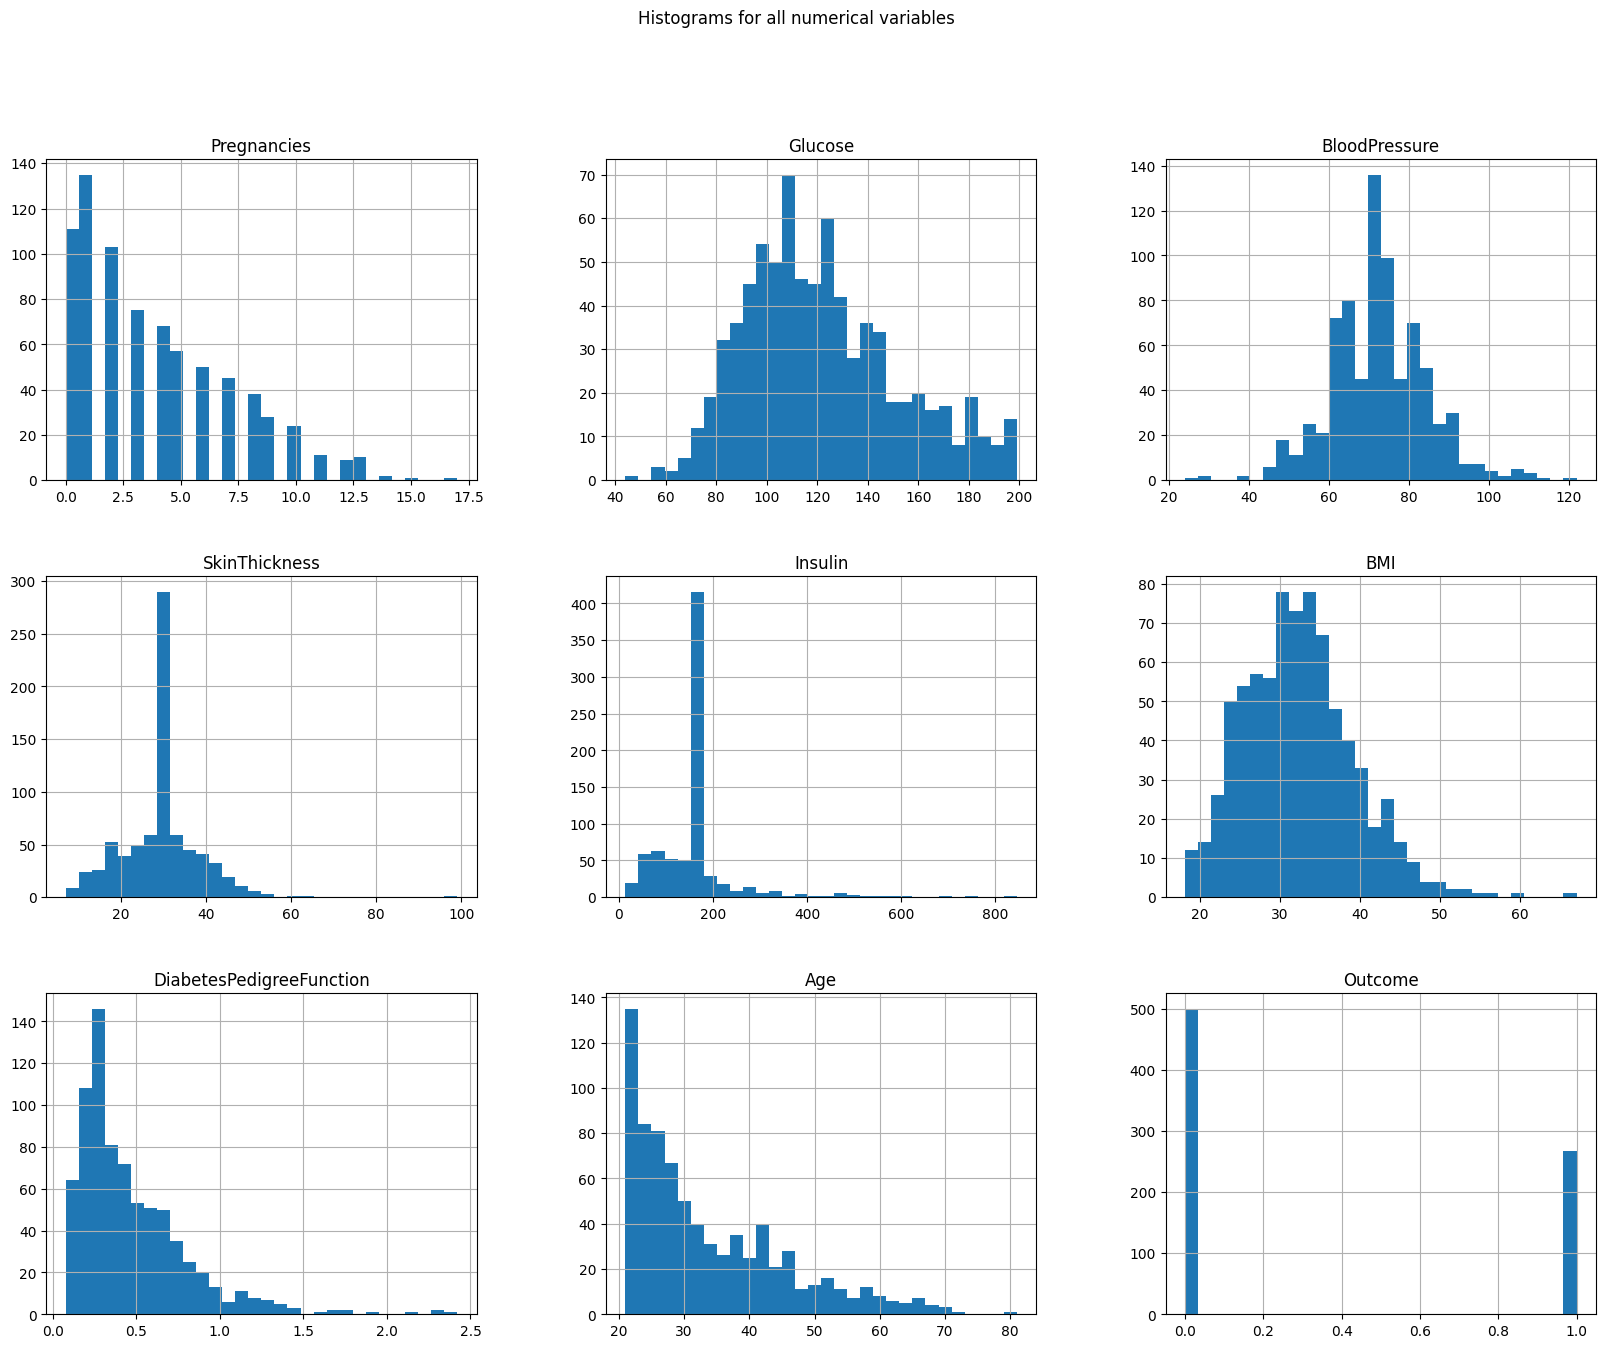

In [7]:
data.hist(bins=30, figsize=(20,15))
plt.suptitle('Histograms for all numerical variables')
plt.show()

Boxplots for numerical variables

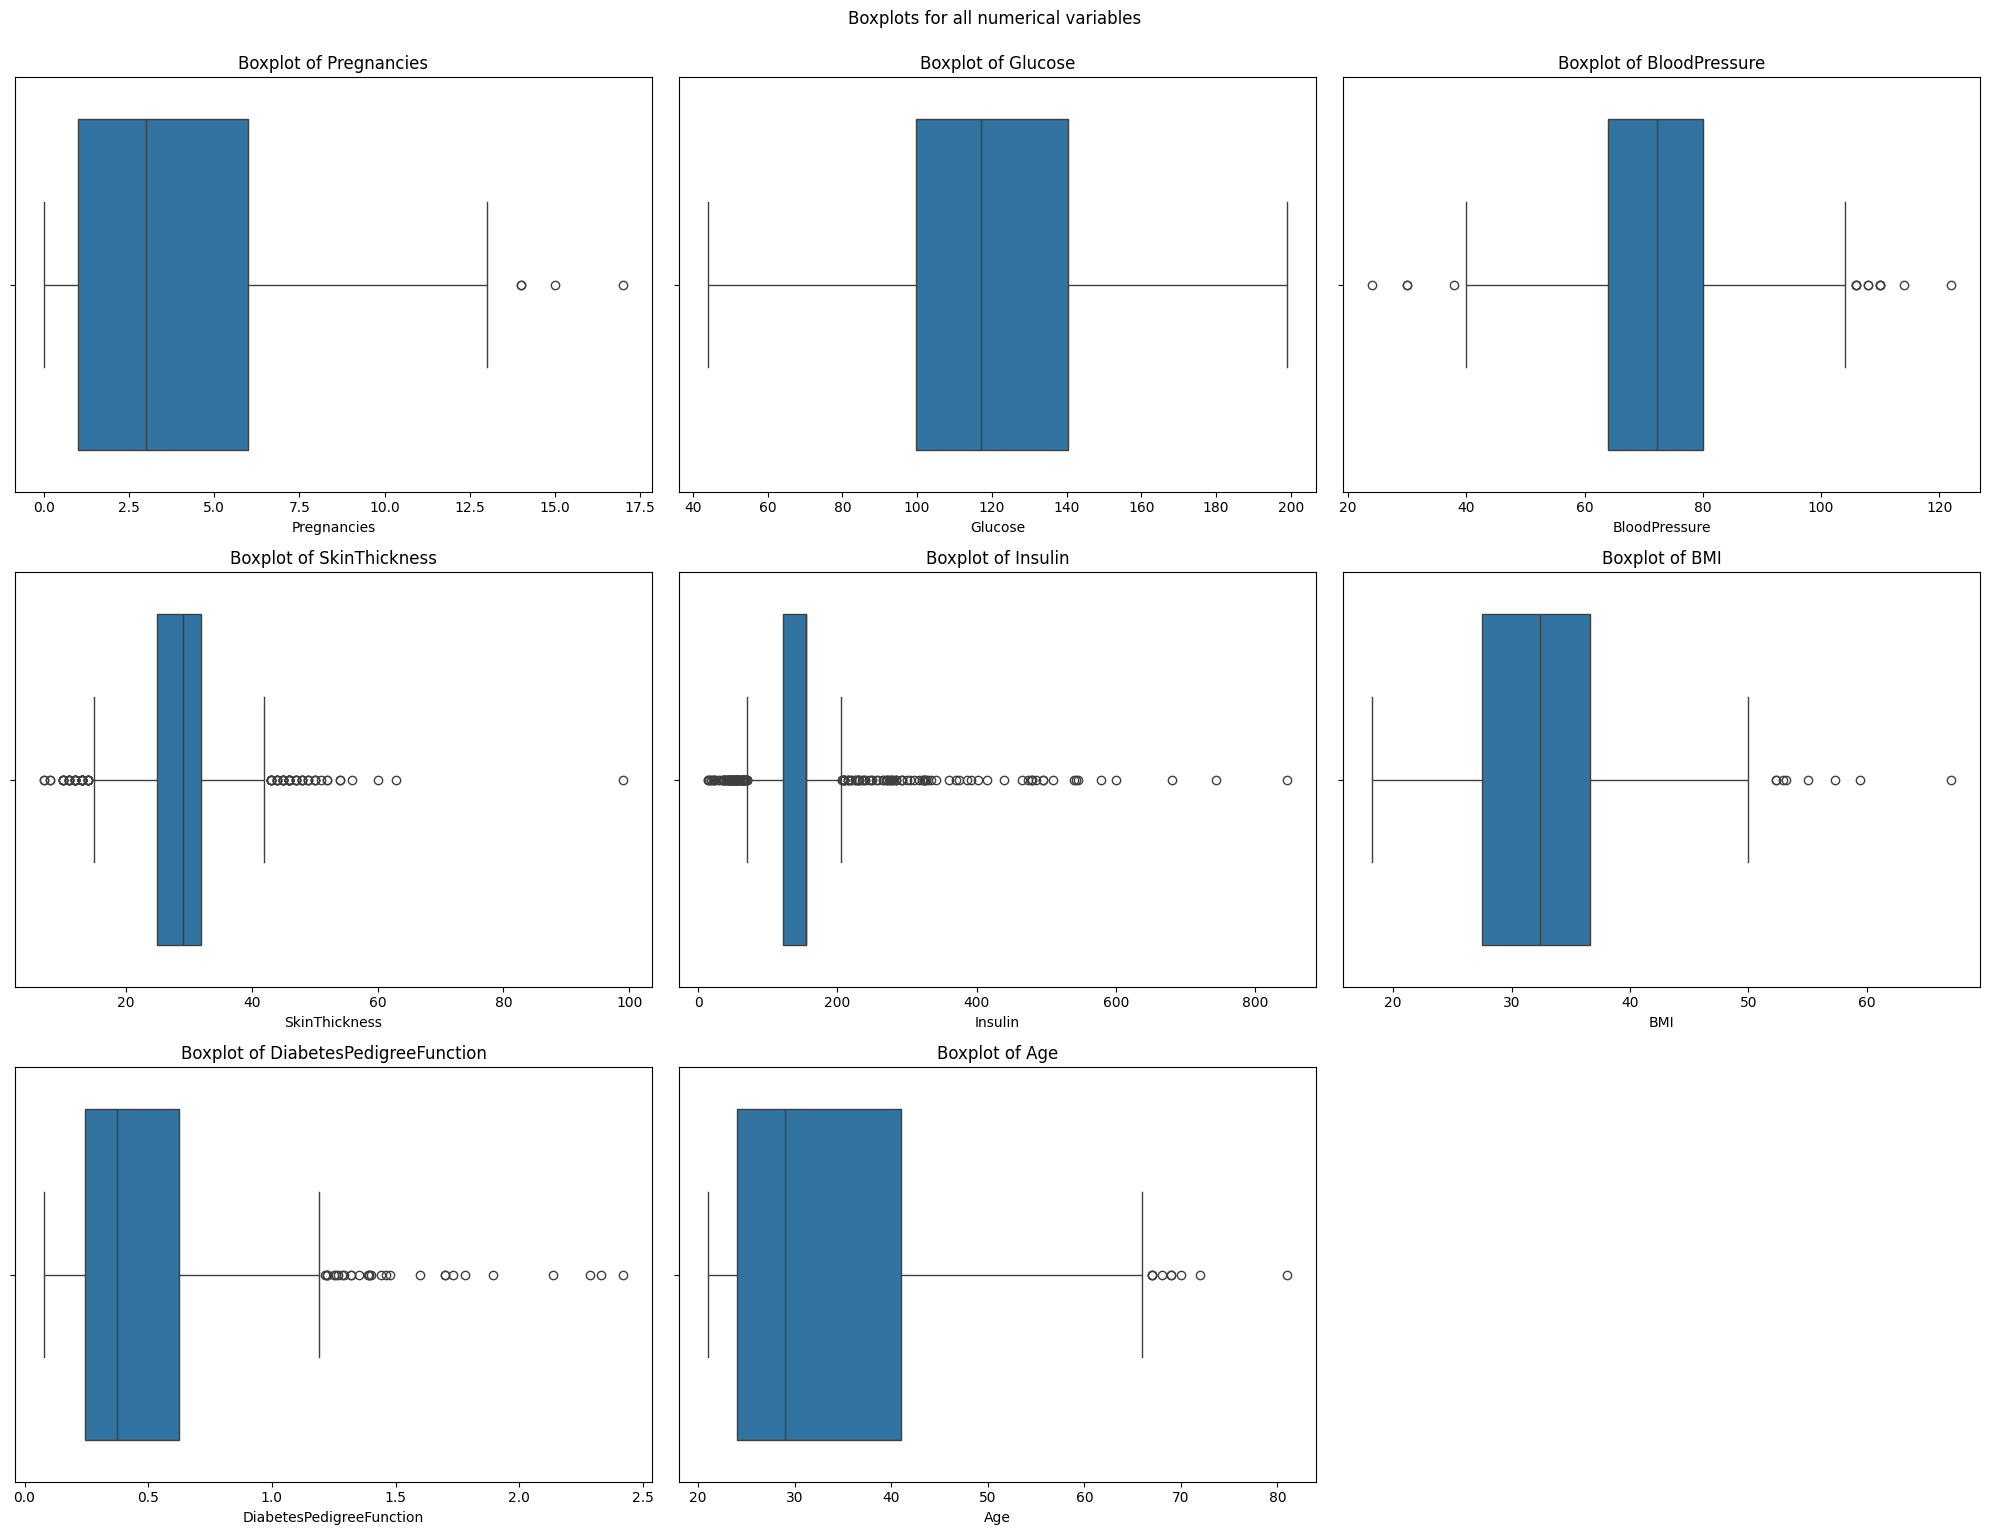

In [8]:
plt.figure(figsize=(20,15))

for i, column in enumerate(data.columns[:-1], 1):

  plt.subplot(3, 3, i)
  sns.boxplot(x=data[column])
  plt.title(f'Boxplot of {column}')

plt.tight_layout()

plt.suptitle('Boxplots for all numerical variables', y=1.02)

plt.show()

Gráficos de Barras
 - Gráfico de barras para a distribuição da variável alvo (`Outcome`).


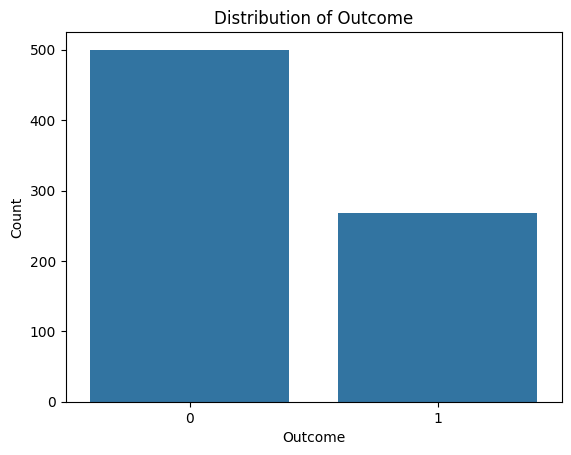

In [9]:
outcome_count = data['Outcome'].value_counts()

sns.barplot(x=outcome_count.index, y=outcome_count.values)

plt.title('Distribution of Outcome')

plt.xlabel('Outcome')

plt.ylabel('Count')

plt.show()

Paridade entre variáveis

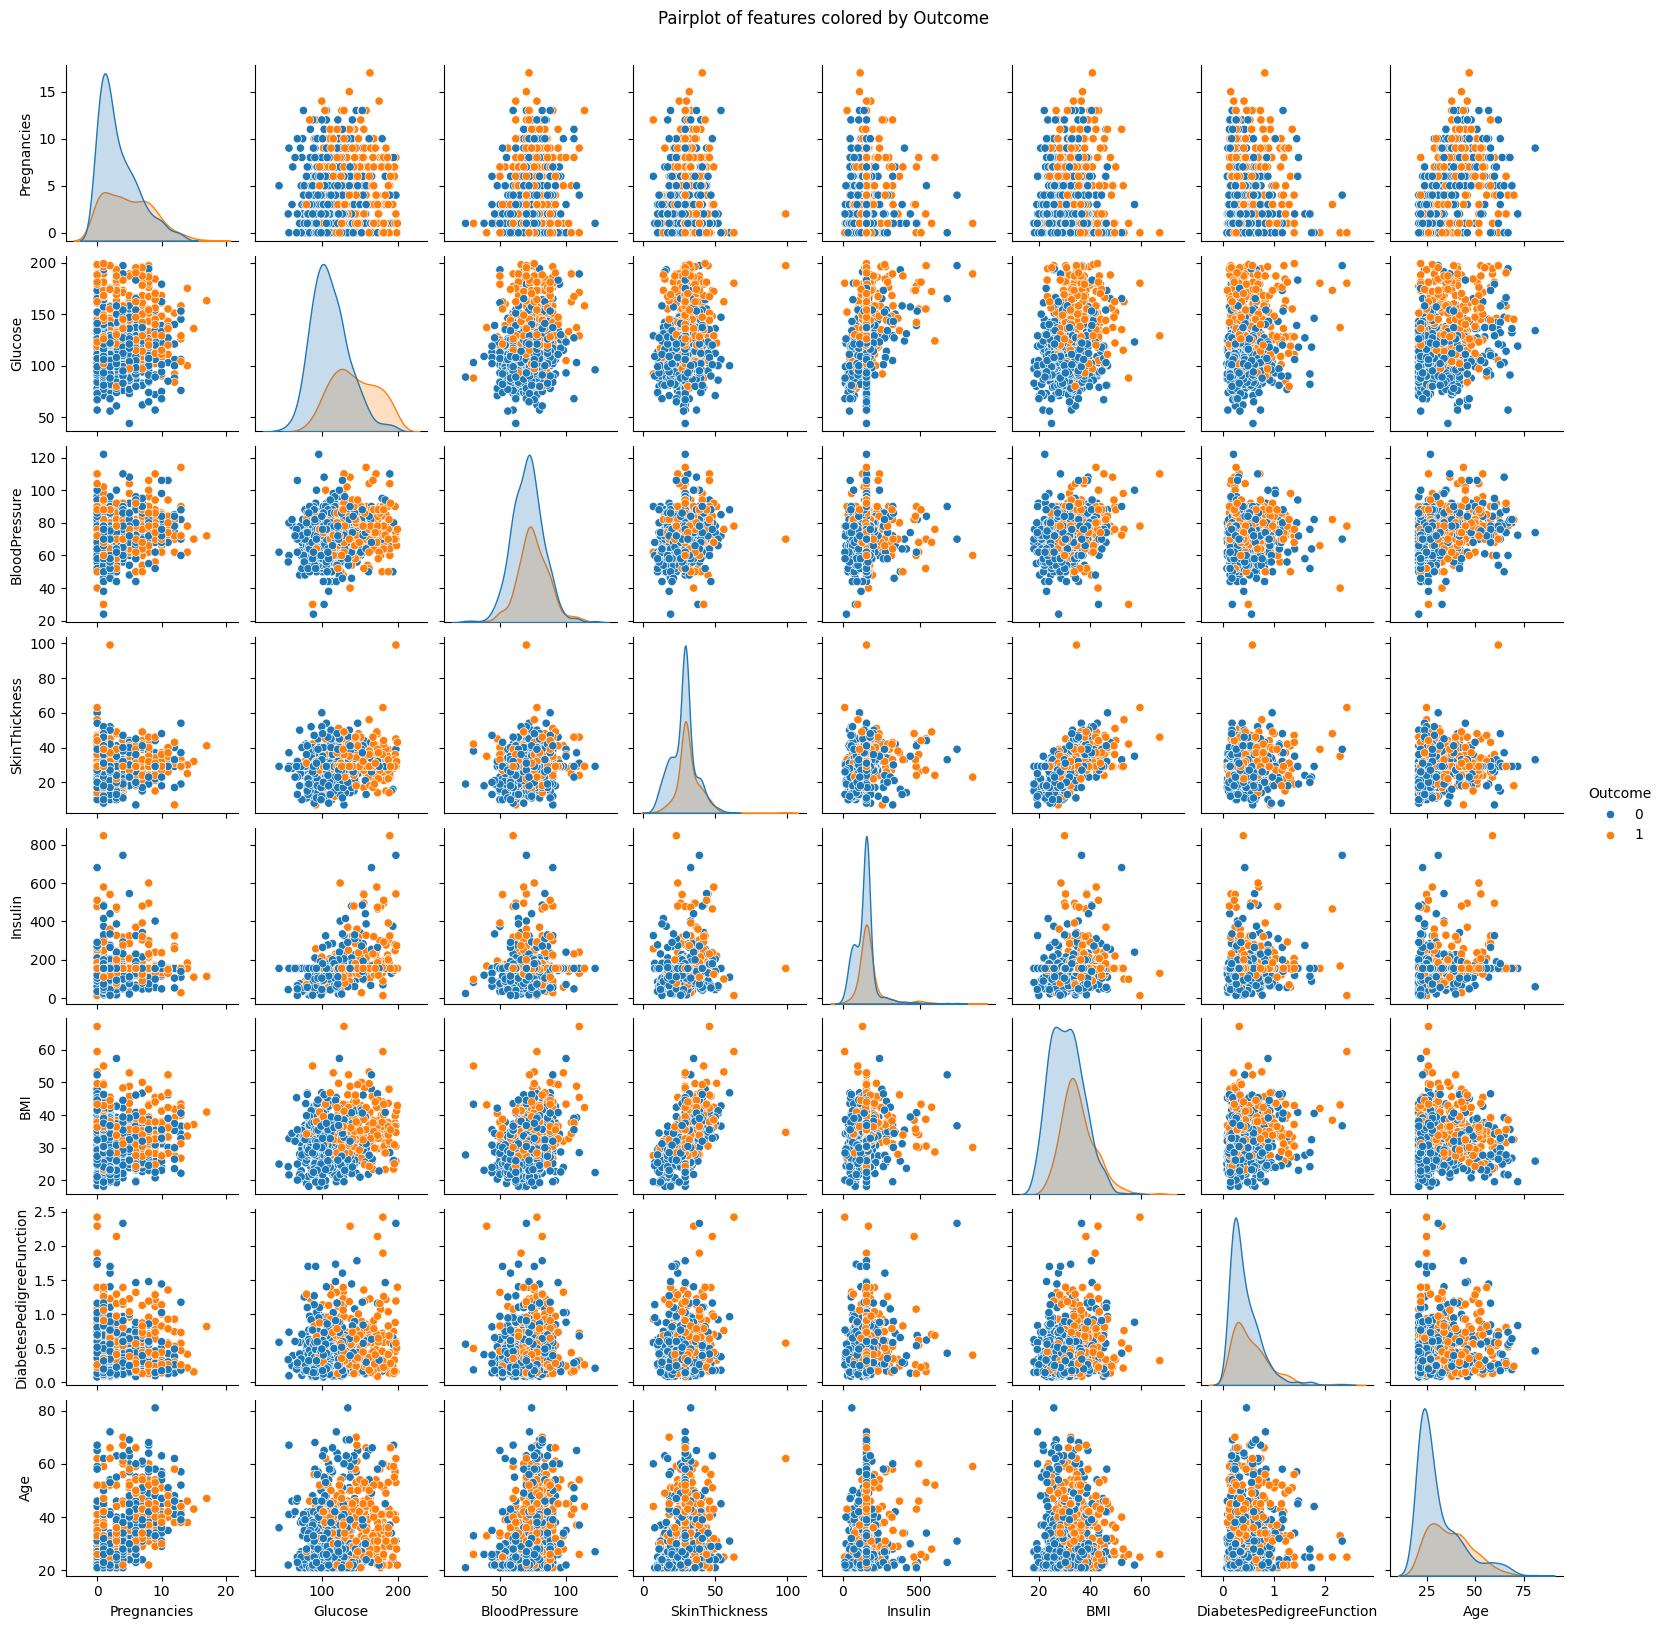

In [10]:
pairplot = sns.pairplot(data, hue='Outcome', diag_kind='kde', height=2)

pairplot.fig.suptitle('Pairplot of features colored by Outcome', y=1.02, fontsize=12)

plt.show()

Heatmap de Correlações

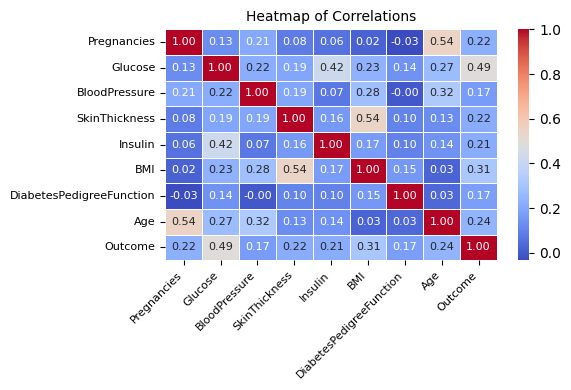

In [11]:
plt.figure(figsize=(6, 4))

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

plt.title('Heatmap of Correlations', fontsize=10)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.yticks(fontsize=8)

plt.tight_layout()

plt.show()

### Preparação dos Dados para Treinamento
- Separação de Variáveis Independentes e Dependentes

In [12]:
X = data.drop(columns='Outcome')
y = data['Outcome']

Divisão em Conjuntos de Treinamento e Teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Normalização dos Dados

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Construção do Modelo de Rede Neural com Keras


Definição do Modelo

In [15]:
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compilação do Modelo

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Treinamento do Modelo


In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
50/50 [==============================] - 1s 7ms/step - loss: 0.7252 - accuracy: 0.4562 - val_loss: 0.7223 - val_accuracy: 0.5610
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6253 - val_loss: 0.6758 - val_accuracy: 0.6423
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6904 - val_loss: 0.6354 - val_accuracy: 0.7236
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6081 - accuracy: 0.7332 - val_loss: 0.5879 - val_accuracy: 0.7317
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7536 - val_loss: 0.5414 - val_accuracy: 0.7480
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7515 - val_loss: 0.5056 - val_accuracy: 0.7480
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 0.5054 - accuracy: 0.7637 - val_loss: 0.4873 - val_accuracy: 0.7561
Epoch 8/50
50/50 [==

### Avaliação do Modelo

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

5/5 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7662
Loss: 0.5441250205039978, Accuracy: 0.7662337422370911


In [40]:
# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred_classes)
print("Relatório de Classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_classes)

5/5 [==============================] - 0s 4ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


Matriz de Confusão:
[[80 19]
 [18 37]]


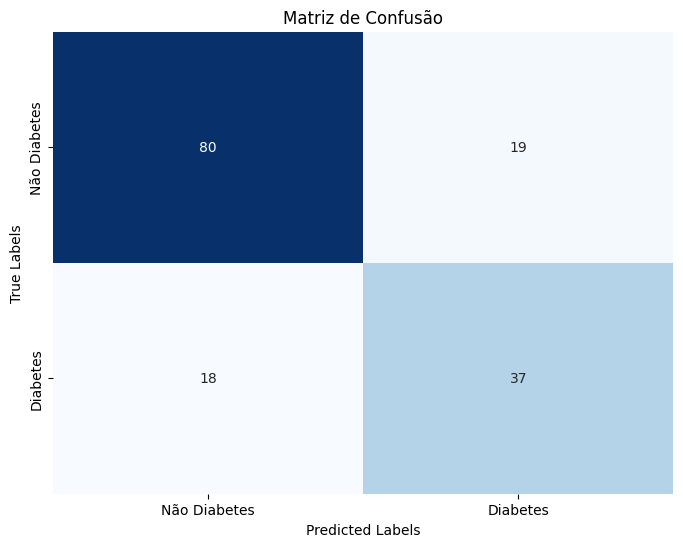

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Diabetes', 'Diabetes'],
            yticklabels=['Não Diabetes', 'Diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusão')
plt.show()

Visualização dos Resultados
Histórico de Treinamento

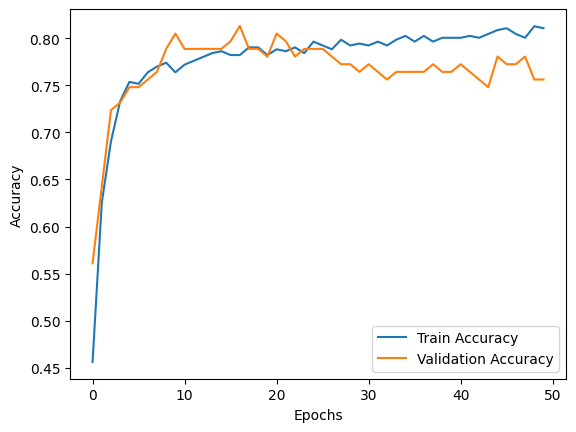

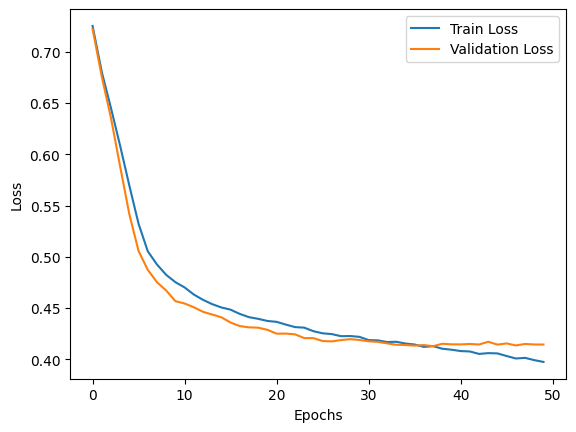

In [19]:
# Histórico de acurácia
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Histórico de perda
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Aplicando a tecnica do Dropout

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = Sequential()

Primeira camada densa com Dropout

In [22]:
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))

Segunda camda densa do Dropout

In [23]:
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

Camad de Saida

In [24]:
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/10
62/62 [==============================] - 1s 7ms/step - loss: 0.6278 - accuracy: 0.6352 - val_loss: 0.5251 - val_accuracy: 0.7792
Epoch 2/10
62/62 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7329 - val_loss: 0.4859 - val_accuracy: 0.7532
Epoch 3/10
62/62 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7378 - val_loss: 0.4829 - val_accuracy: 0.7662
Epoch 4/10
62/62 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7720 - val_loss: 0.4914 - val_accuracy: 0.7662
Epoch 5/10
62/62 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.7606 - val_loss: 0.4907 - val_accuracy: 0.7727
Epoch 6/10
62/62 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.7720 - val_loss: 0.4987 - val_accuracy: 0.7532
Epoch 7/10
62/62 [==============================] - 0s 3ms/step - loss: 0.4496 - accuracy: 0.7932 - val_loss: 0.4978 - val_accuracy: 0.7597
Epoch 8/10
62/62 [==

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy do Modelo: {accuracy * 100:.2f}%')

5/5 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7597
Accuracy do Modelo: 75.97%
